In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from vahun.tools import Timer
from vahun.corpus import Corpus
from vahun.tools import explog
from vahun.variational_autoencoder import Variational_autoencoder
from vahun.tools import show_performance

encode=180
dictsize=2000000
popsize=1


config = tf.ConfigProto()
config.gpu_options.allow_growth = True
#config.gpu_options.per_process_gpu_memory_fraction=1
corp_path='/mnt/permanent/Language/Hungarian/Corp/Webkorpusz/webkorpusz.wpl'
corp=Corpus(corpus_path=corp_path,
            needed_corpus=["hun_lower_unique"],
            language="Hun",size=dictsize,encoding_len=10)
database=corp.hun_lower_unique
all_features=corp.featurize_data_charlevel_onehot(database)
train=all_features[0:int(len(all_features)*0.8)]
test=all_features[int(len(all_features)*0.8):len(all_features)]
x_train = train.reshape((len(train), np.prod(train.shape[1:])))
x_test = test.reshape((len(test), np.prod(test.shape[1:])))
print(x_train.shape)

logger=explog(encoder_type="variational_unique_"+str(encode),
              encoding_dim=encode,feature_len=10,
              lang="Hun",unique_words=len(set(database)),
              name="variational_unique_"+str(encode),population_size=popsize,
              words=len(corp.hun_lower_unique))

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

Reading file, speed:  2289773.4686134337  words/s
Reading file, speed:  2182918.882909515  words/s
Corpus initalized, fields: ['hun_lower_unique'] 
Unique words:  214708
(81526, 360)


In [2]:
encoder=Variational_autoencoder(logger=logger,tf_session=sess,
                         inputdim=360,
                         encoding_size=180,
                         optimizer =tf.train.AdamOptimizer(learning_rate = 0.001),
                         nonlinear=tf.sigmoid)
encoder.train(x_train,x_test,512,80)

 ügyfeleik 	   gyfeleik


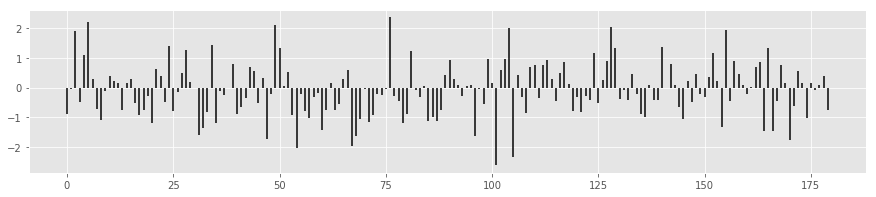

 moldvával 	  moldvával


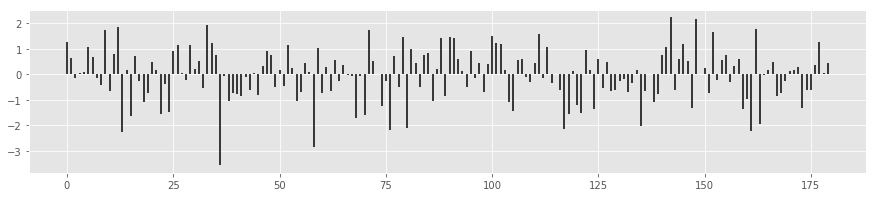

családügyi 	 családygyi


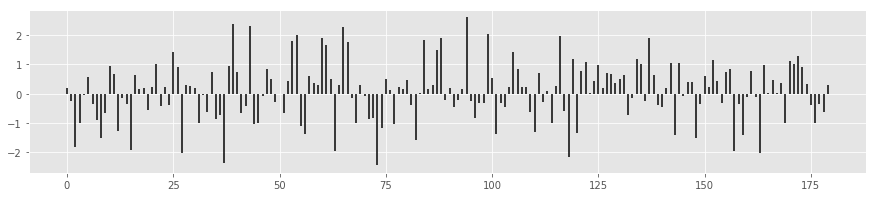

      iszl 	       iszl


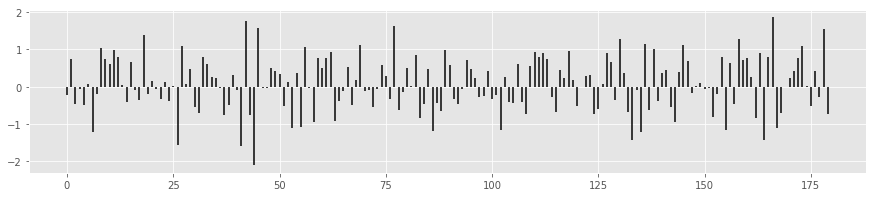

 hívásomat 	  bavásomat


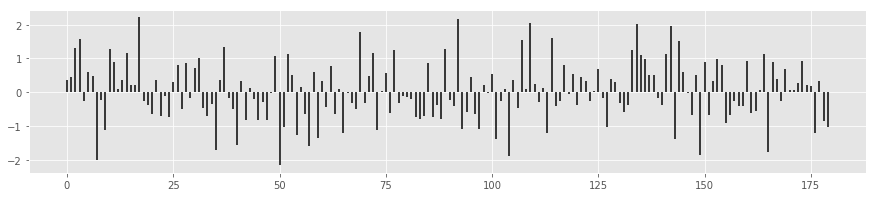

  társulva 	   társulva


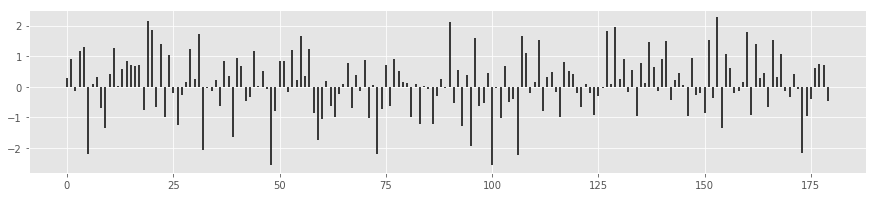

 hányódott 	  hányódott


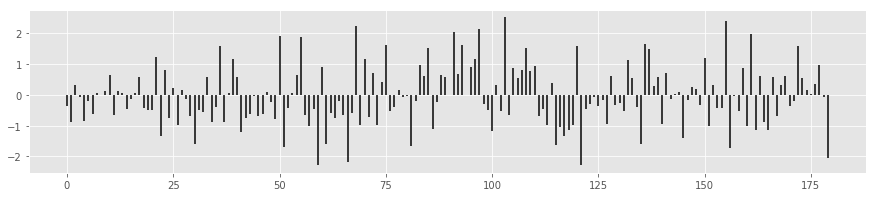

  tagjaira 	   tagjaira


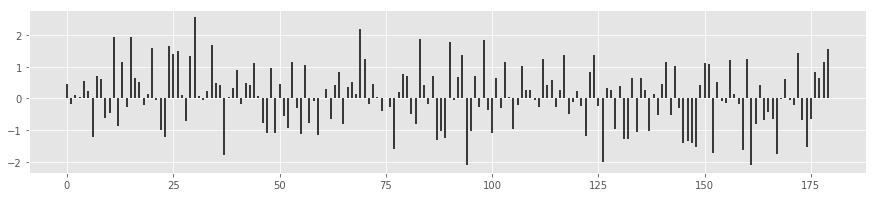

     tünet 	      tőnet


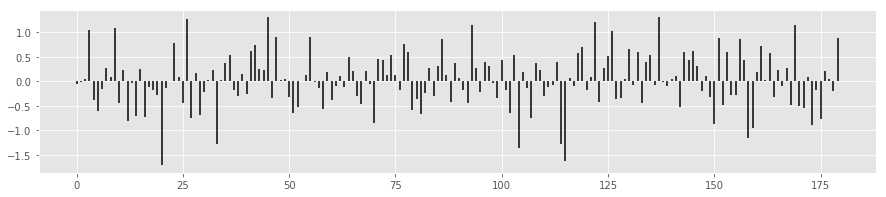

     kűrök 	      körök


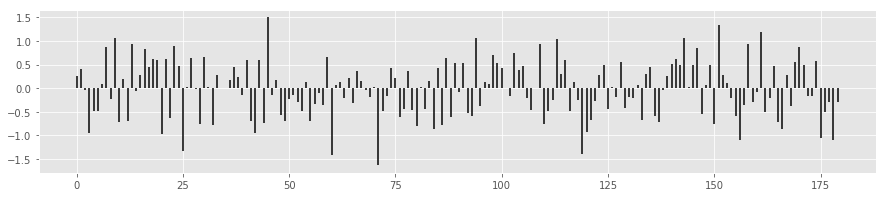

alapterhet 	 elapterhet


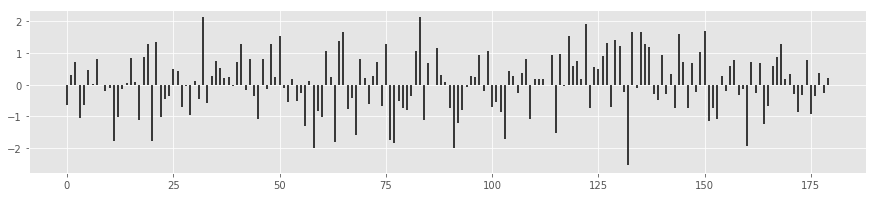

akrobatika 	 bkrobatika


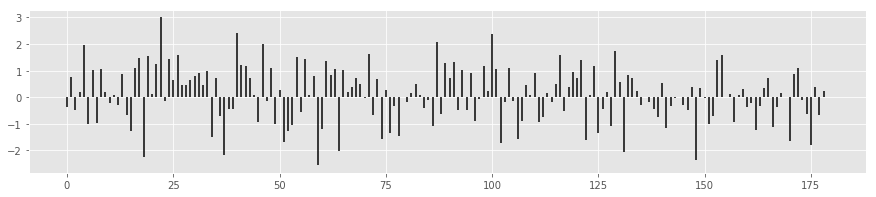

    csurig 	     csurig


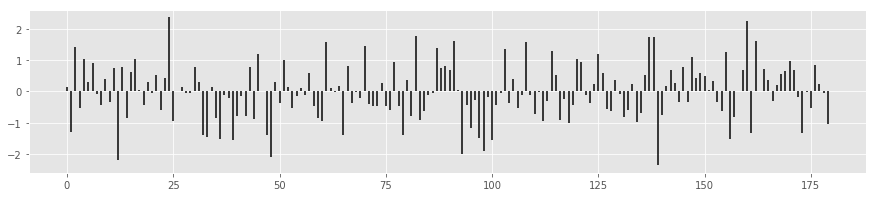

    riaszt 	     riaszt


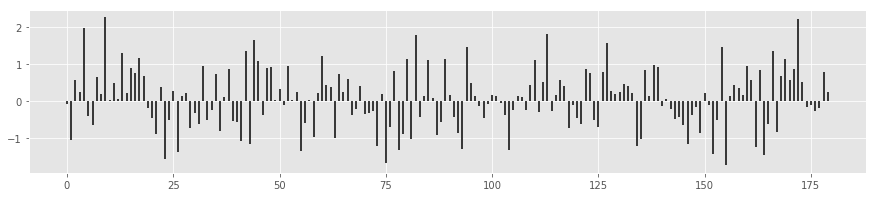

   óvodába 	    rvodába


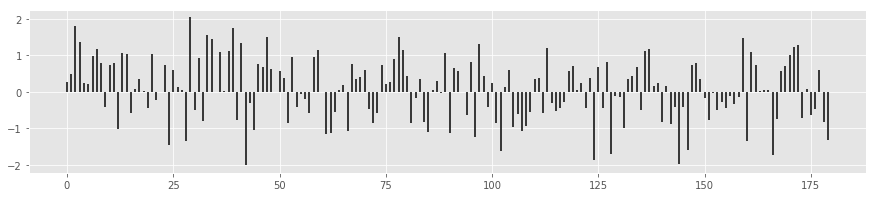

 üldögélve 	  áldögélve


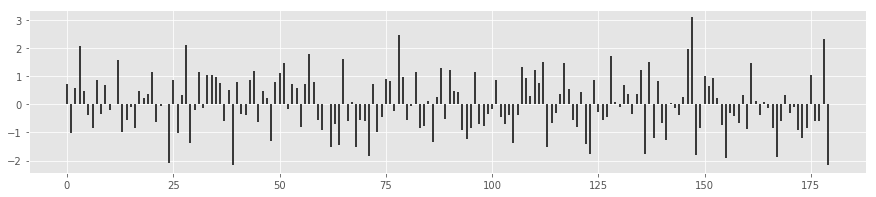

     jozef 	      jozem


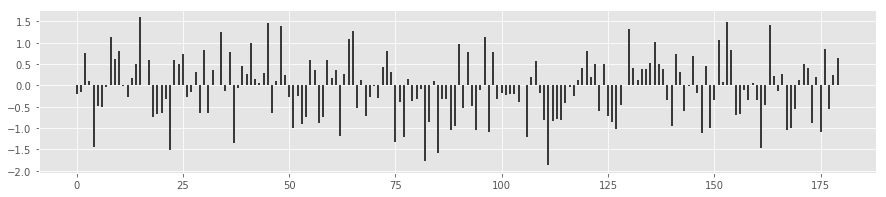

   utókora 	    utókora


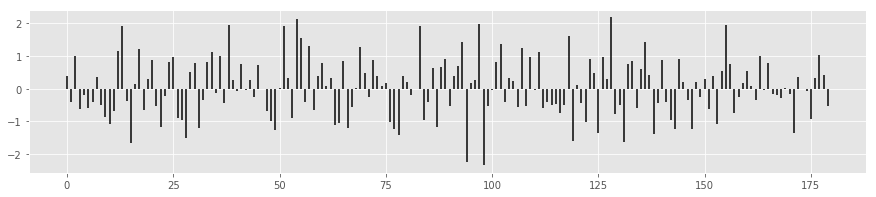

 kiképezni 	  kiképezni


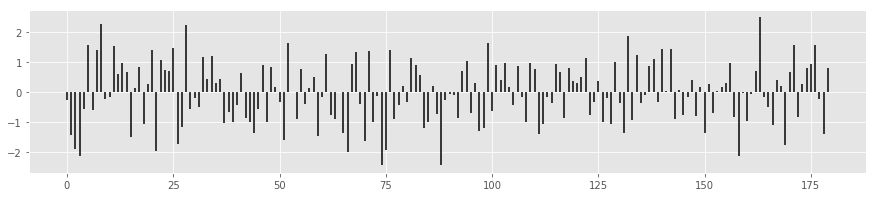

  voltában 	   voltában


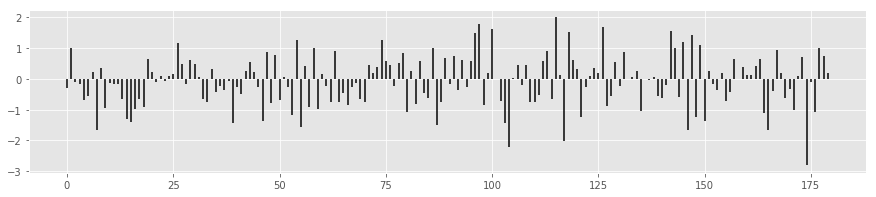

 nagynéném 	  nagynéném


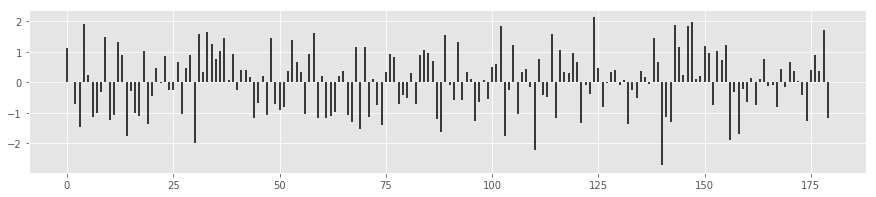

 száradási 	  száradási


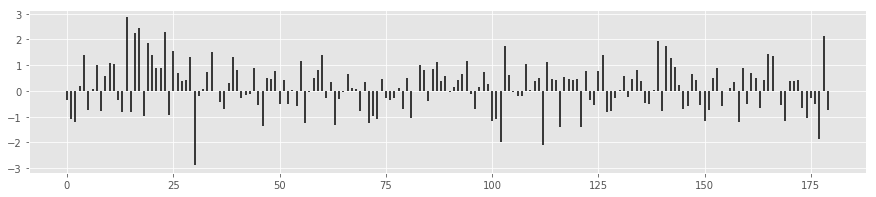

   elértem 	    elértem


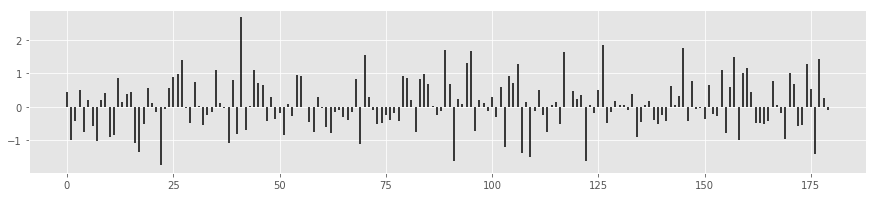

     lipót 	      lipót


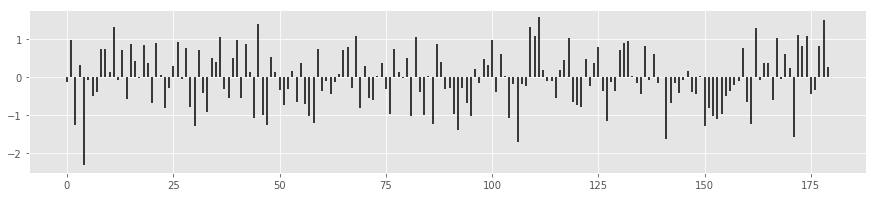

   parókát 	    parókát


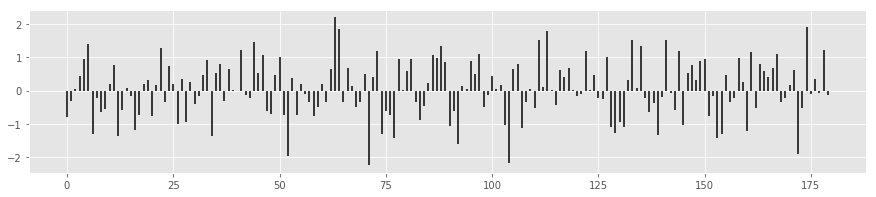

  másságot 	   másságot


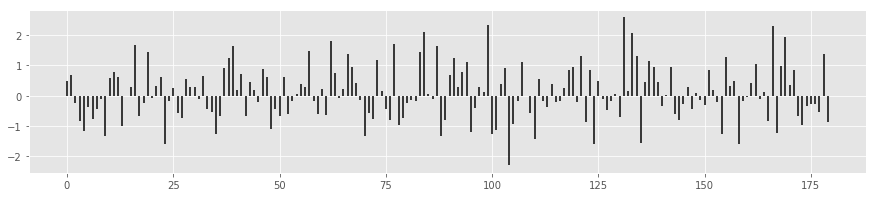

jelenjenek 	 belenjenek


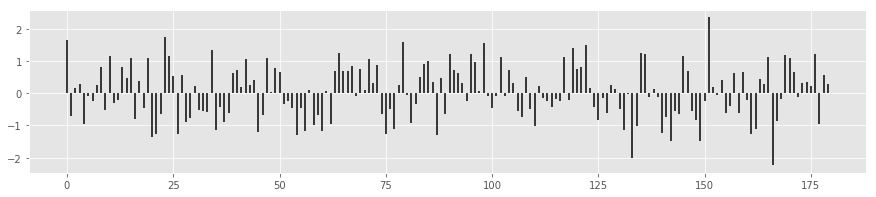

   alkotom 	    alkotom


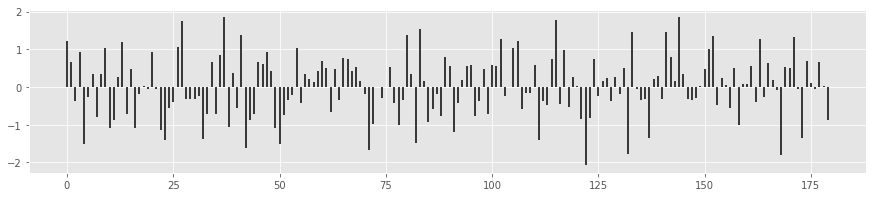

   csiszár 	    csiszár


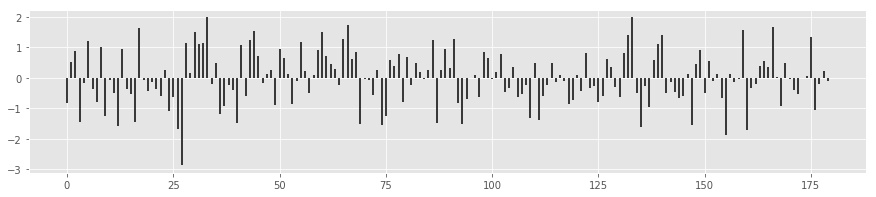

   furmint 	    furmint


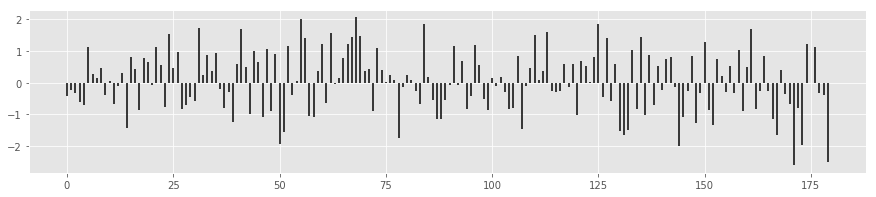

   témával 	    témával


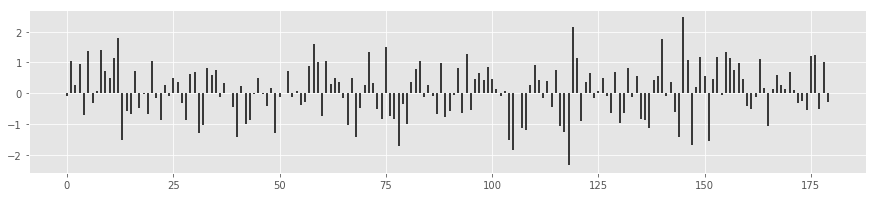

   gazella 	    gazella


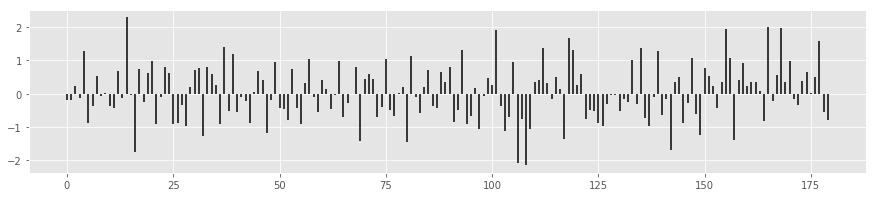

   elviszi 	    elviszi


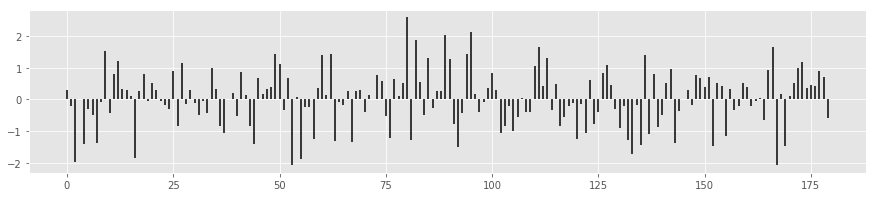

visszaméne 	 visszaméne


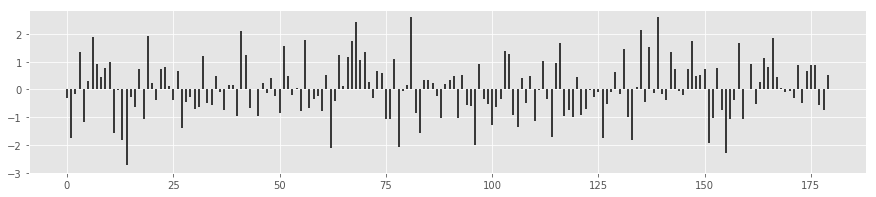

   derekát 	    derekát


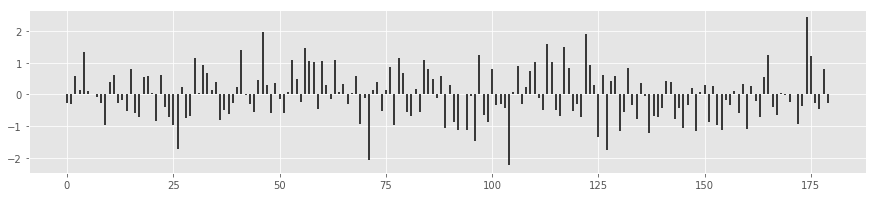

  titulált 	   titulált


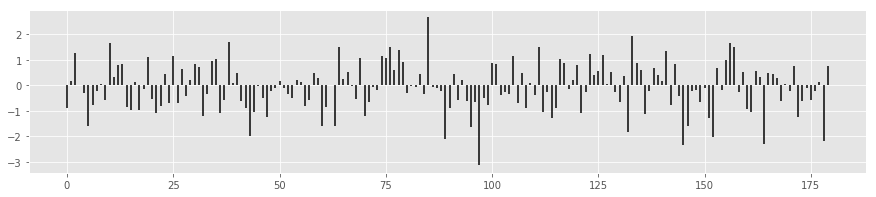

  szobrász 	   szobrász


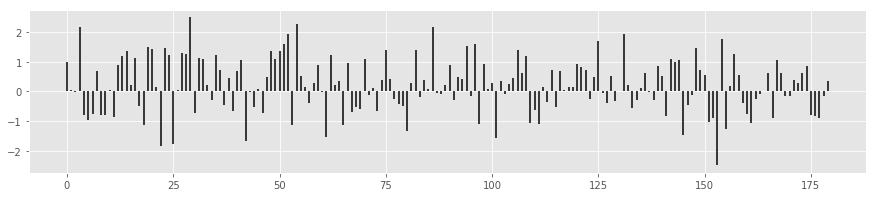

   halálig 	    halálig


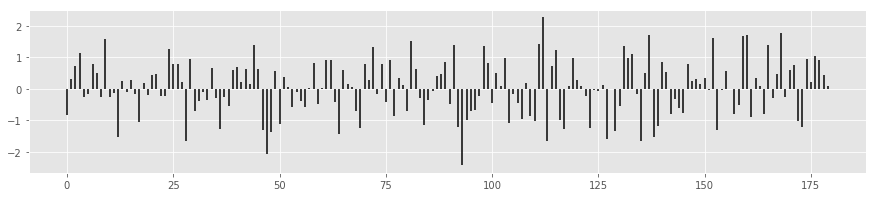

  csuhások 	   csuhások


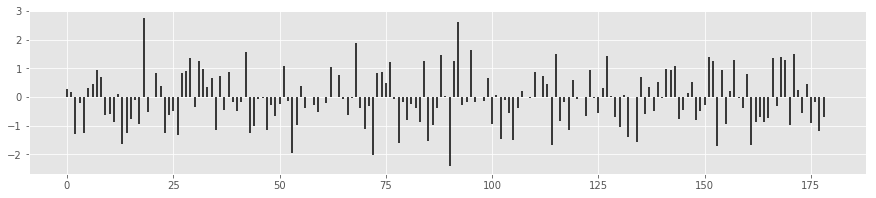

   szedték 	    szedték


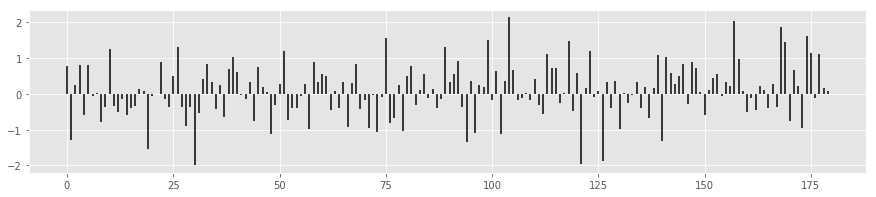

   bánatát 	    bánatát


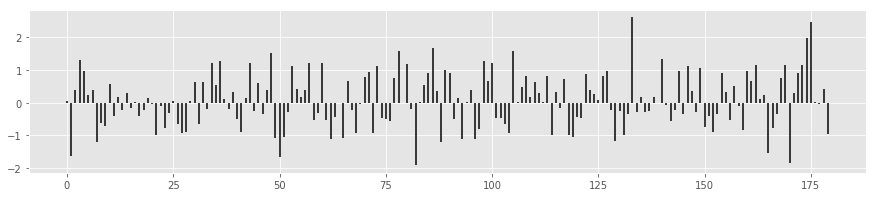

   határát 	    határát


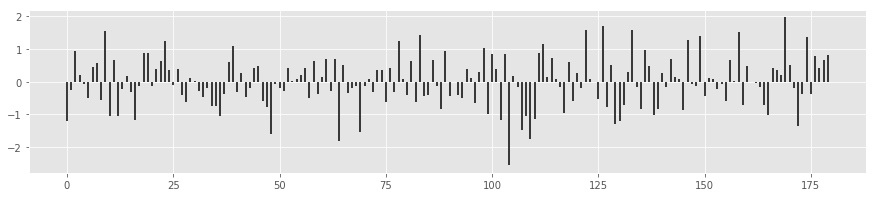

     dupka 	      dupka


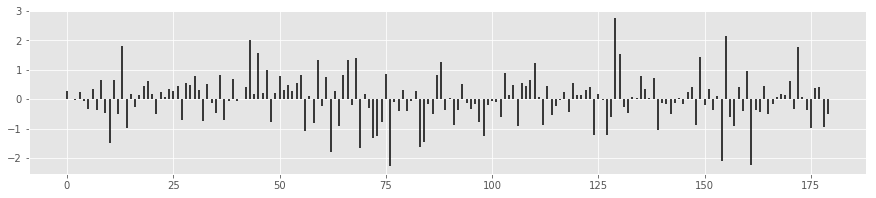

  odaérjek 	   odaérjek


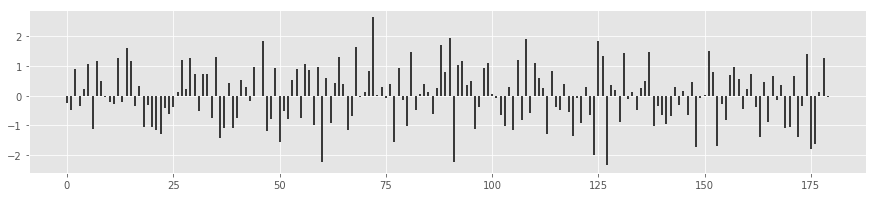

 eszmények 	  eszmények


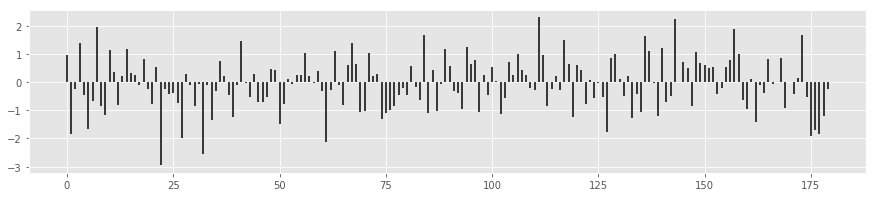

 harcaikat 	  harcaikat


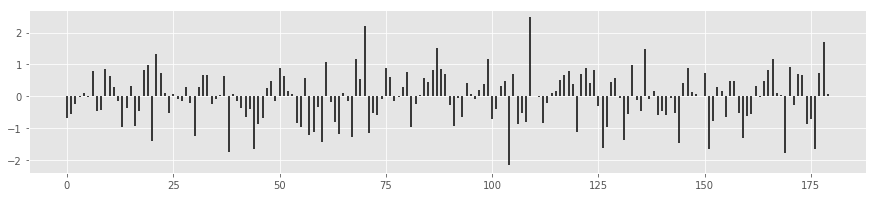

habzsolnak 	 habzsolnak


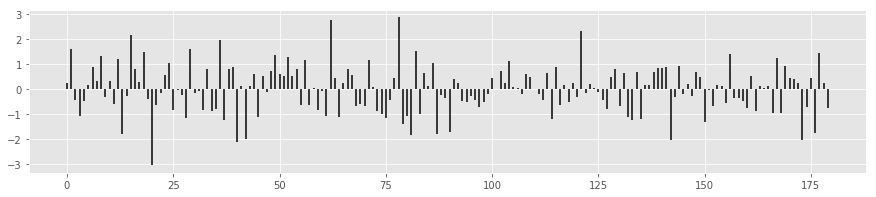

vasfüggöny 	 hasfuggüny


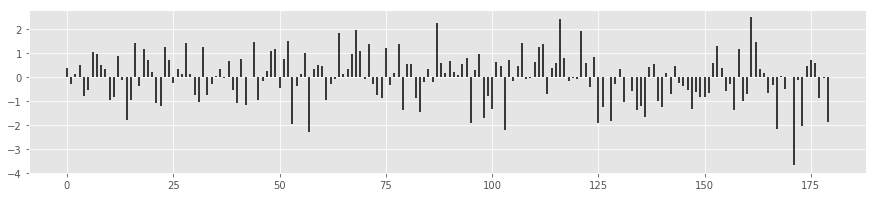

rövidebbre 	 tövidebbre


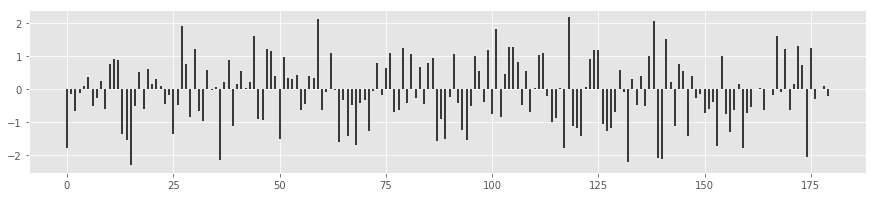

   kertjén 	    kertjén


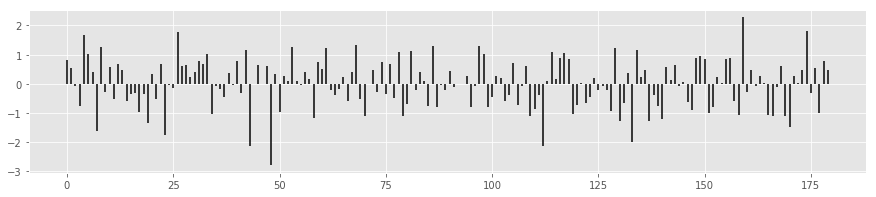

      önök 	       önök


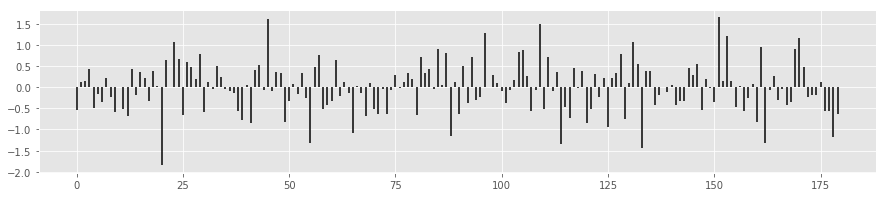

    vártuk 	     vártuk


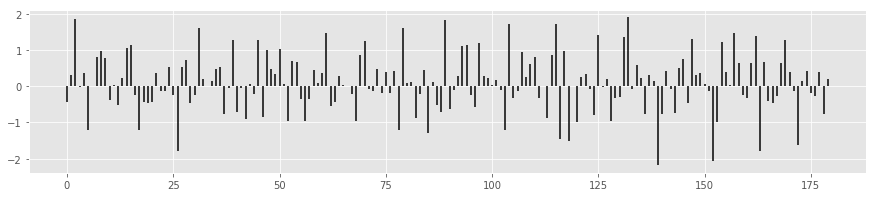

beállítást 	 beállítást


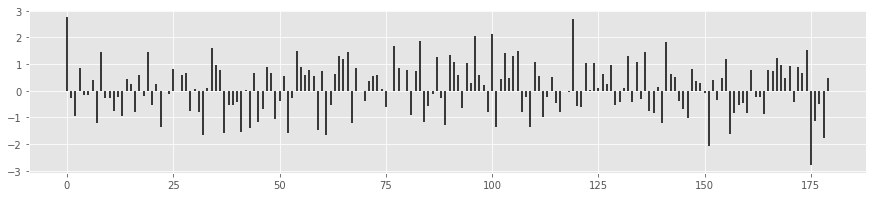

  mongolok 	   mongolok


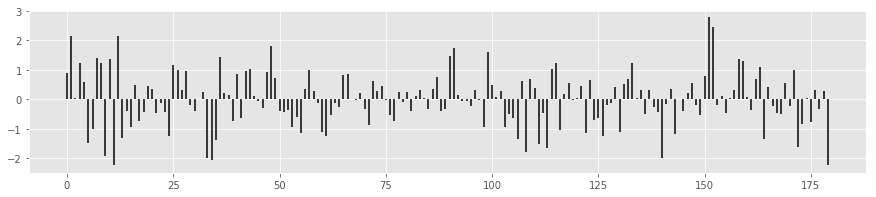

magazinunk 	 magazinunk


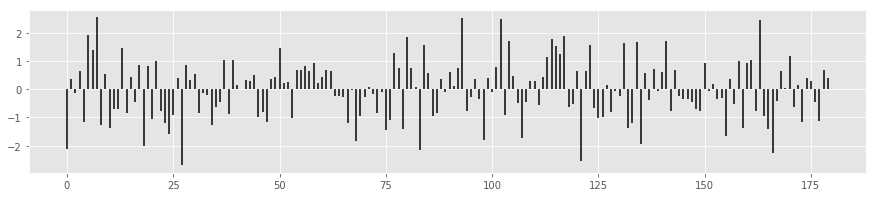

hiányoznak 	 hiányoznak


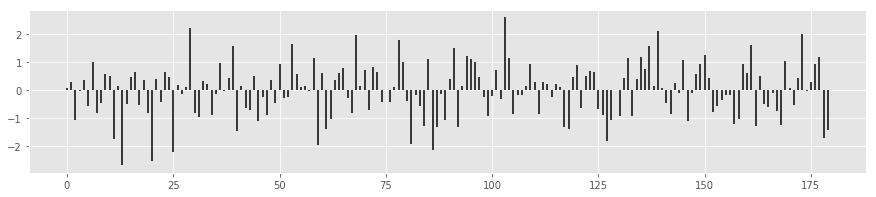

   formula 	    formula


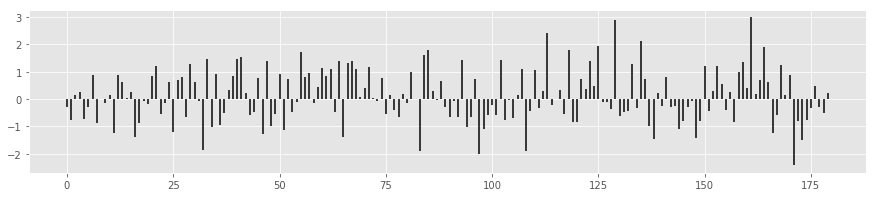

  objektív 	   objektőa


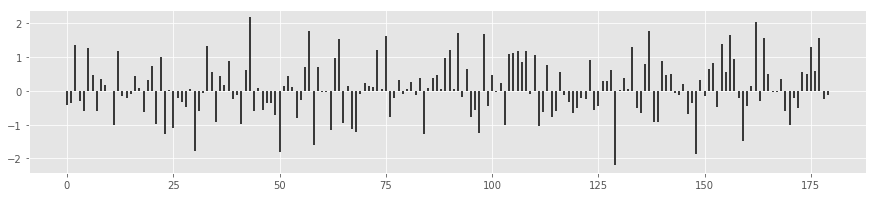

      goes 	       goes


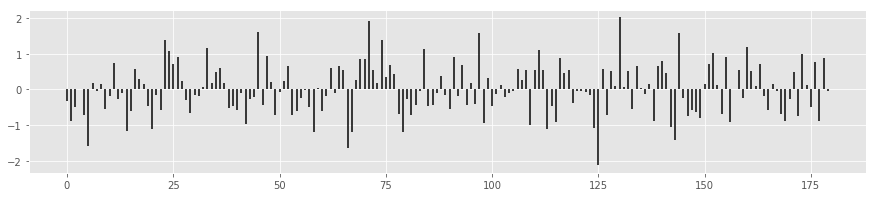

      több 	       t bb


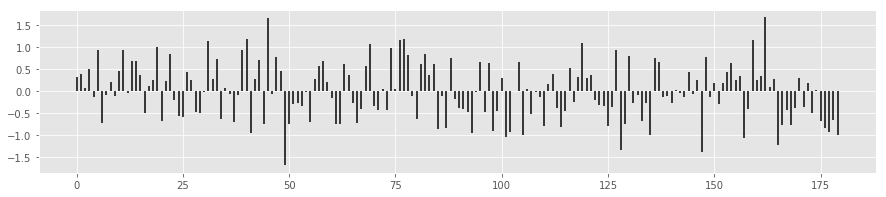

barátnőhöz 	 barátnöhöz


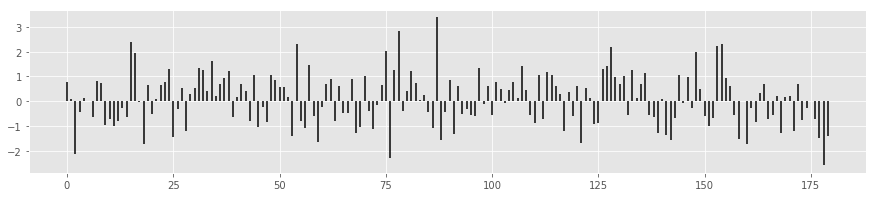

      bánó 	        ánó


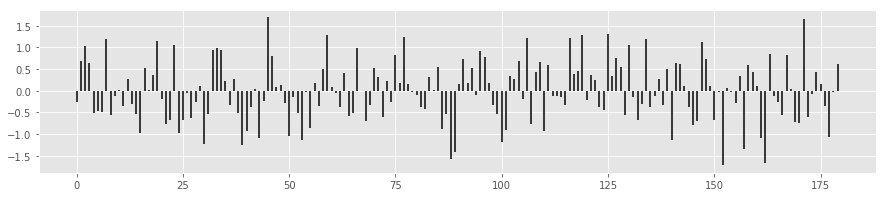

 bátyjával 	  hátyjával


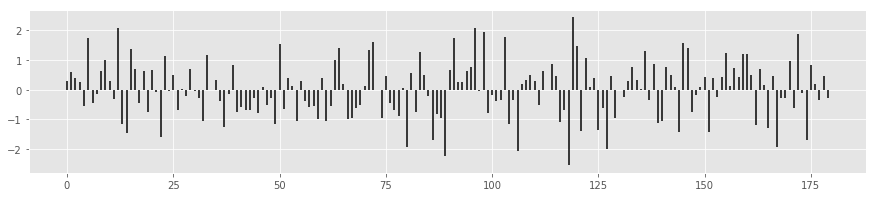

 takarások 	  takarások


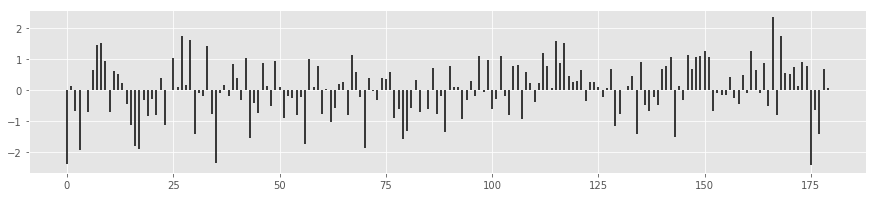

 fafaragás 	  fafaragás


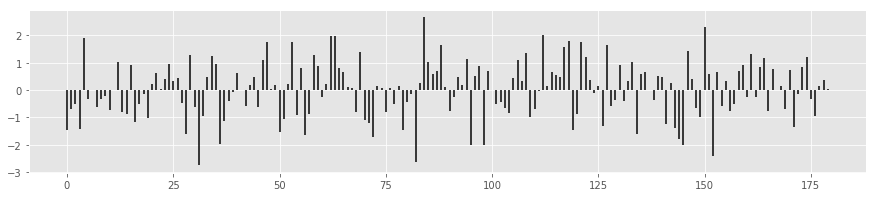

  sáskától 	   sáskától


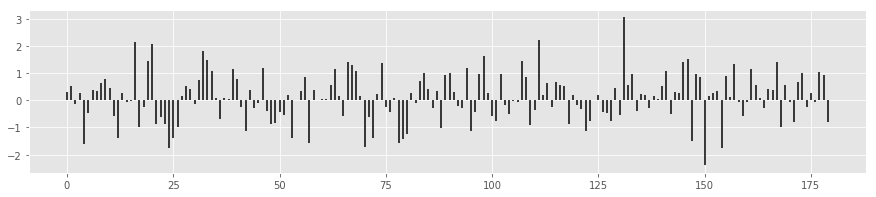

   hiricsi 	    hiribsi


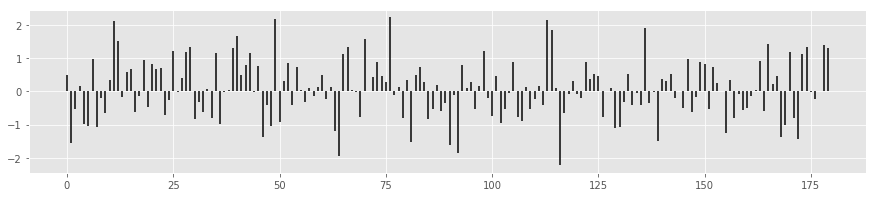

   keverőt 	    keverőt


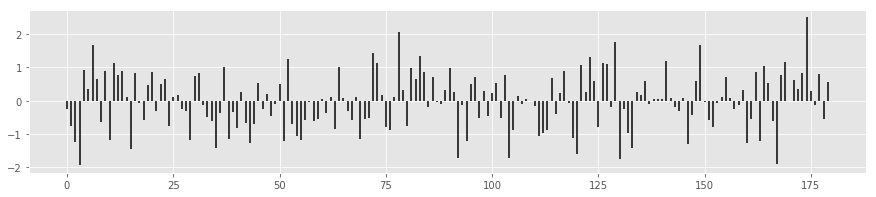

  tévelygő 	   tévelygő


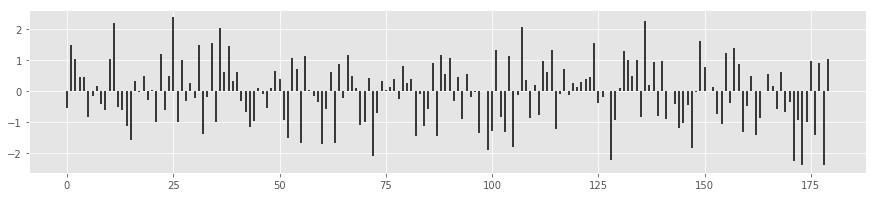

       ein 	        ein


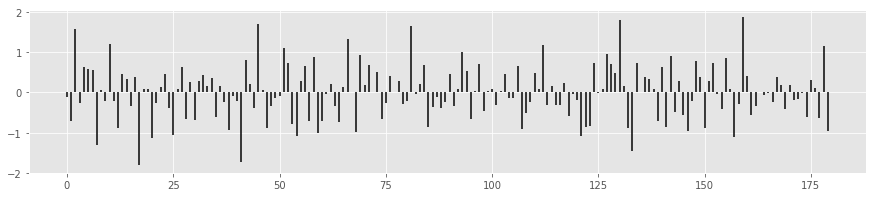

fogadhatók 	 fogadhatók


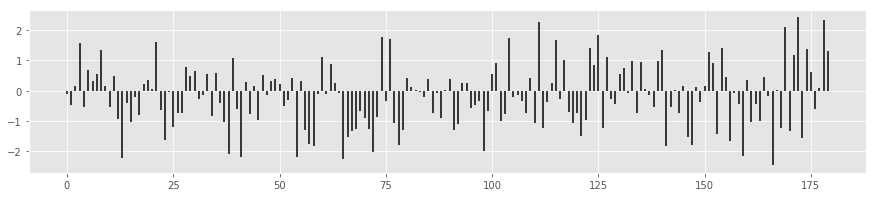

    public 	     publit


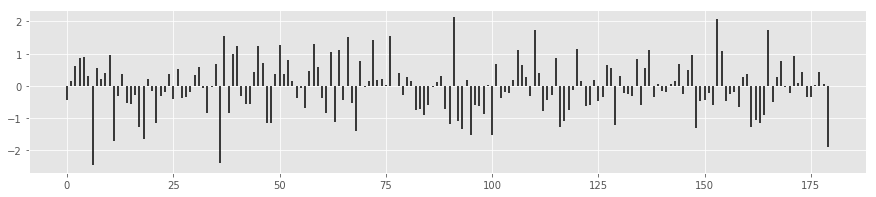

  szalámit 	   szalámit


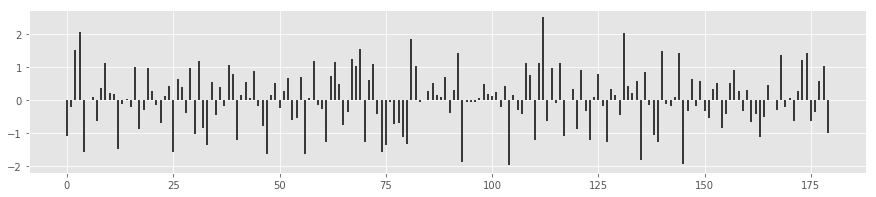

    qornet 	     pornet


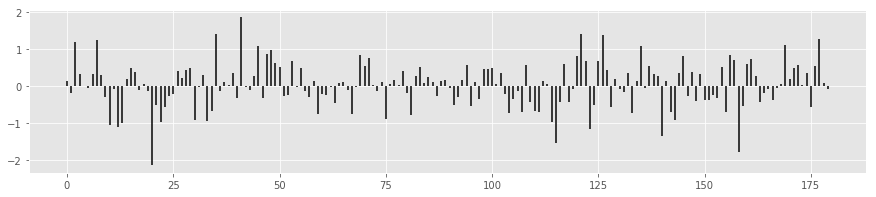

    ügyévé 	     ugyéva


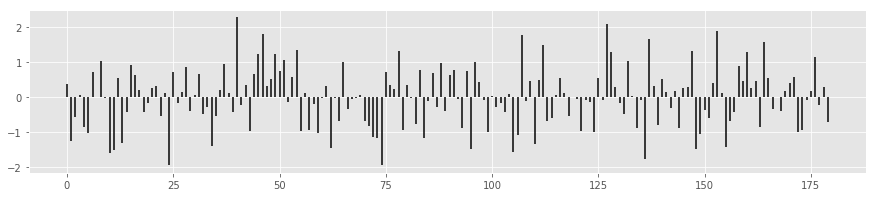

 visszahat 	  visszahat


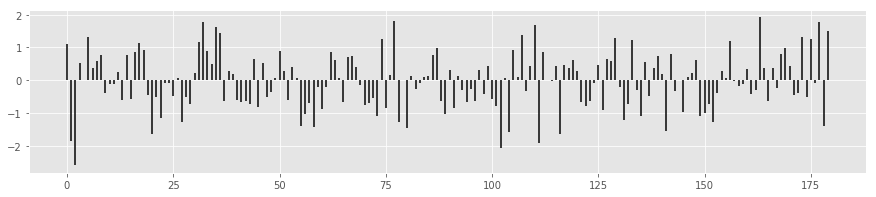

tételekhez 	 tételekhez


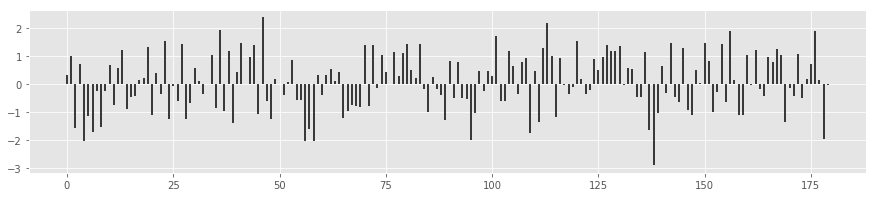

  nyomtávú 	   nyomtávú


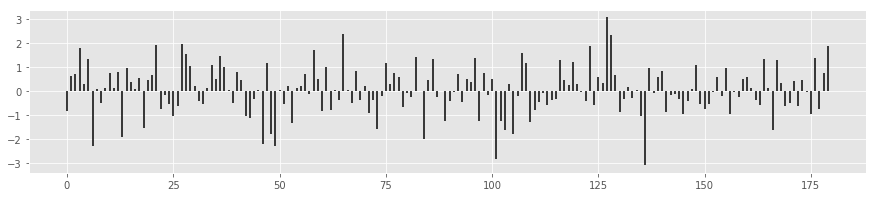

borvidékek 	 borvidékek


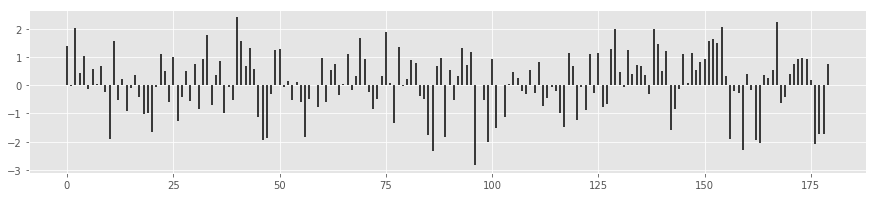

elismerési 	 elismerési


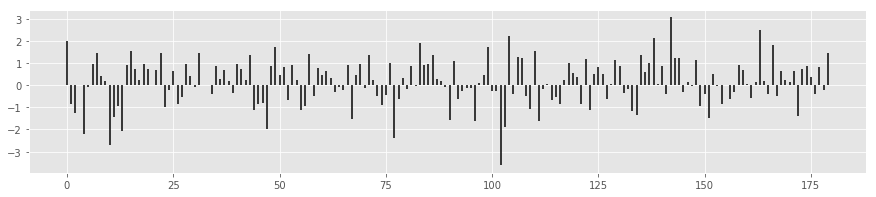

kuncsaftot 	 köncsaptot


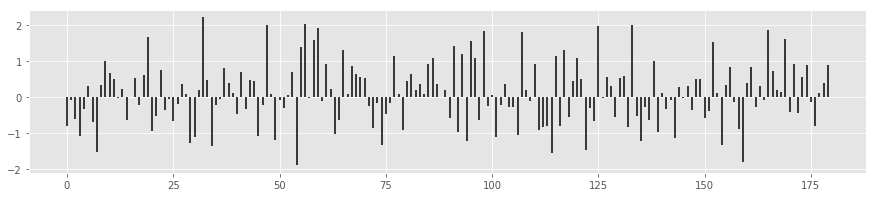

 gyűlölted 	  gyölölted


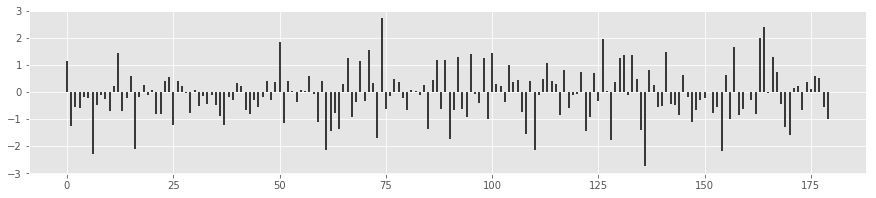

 elcsípünk 	  elcsíppnk


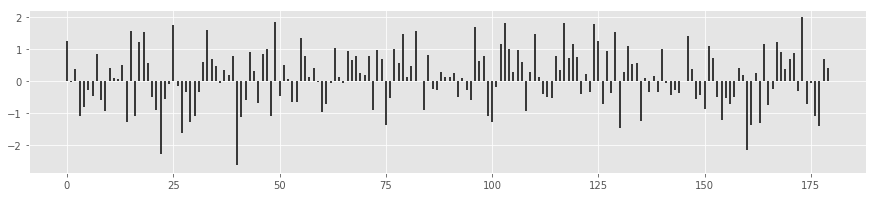

 válásakor 	  válásakor


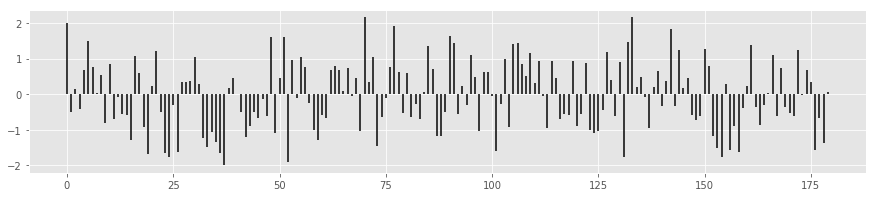

     swift 	      sáist


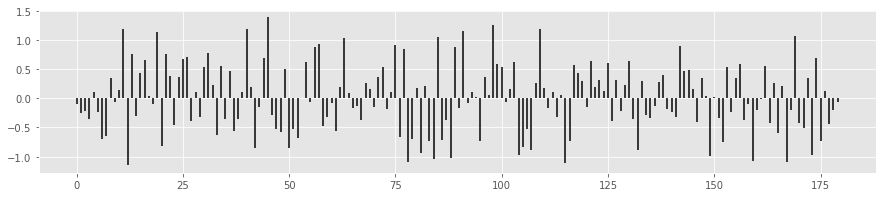

    testet 	     testet


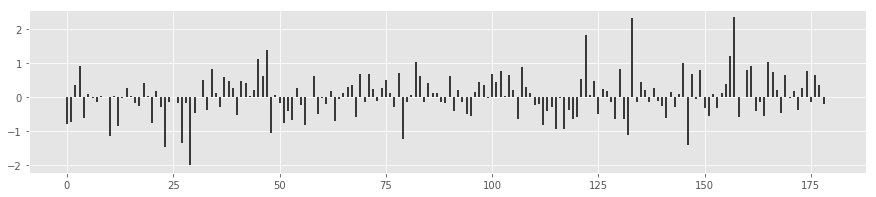

fejfedővel 	 feffedövel


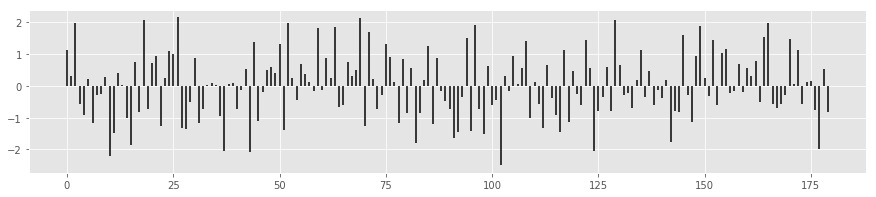

  rajzolat 	   rajzolat


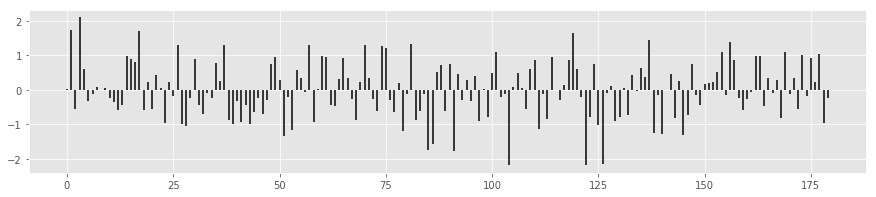

koppenhága 	 koppencága


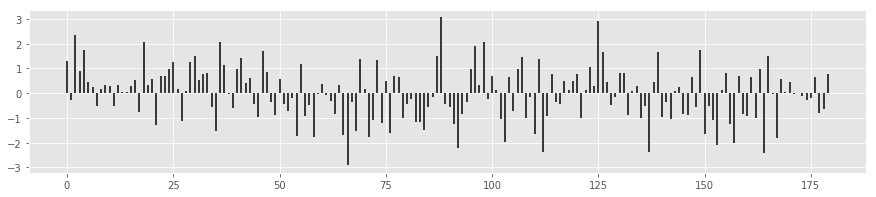

      hátú 	        átő


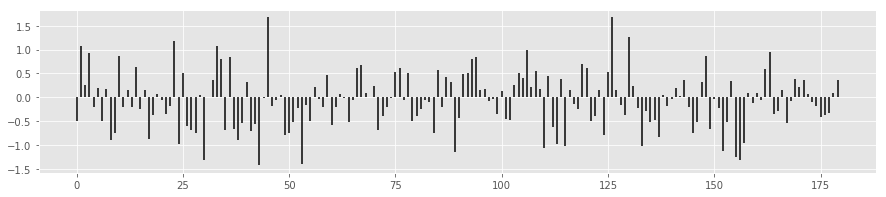

bombariadó 	 bombariadó


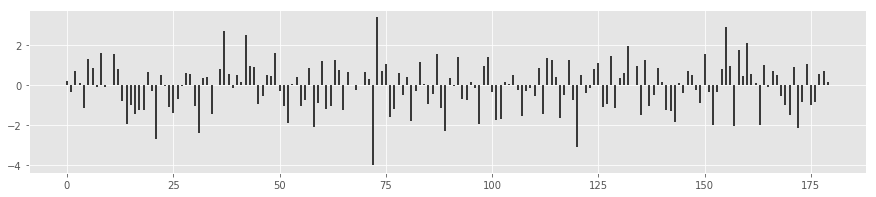

    talpak 	     talpak


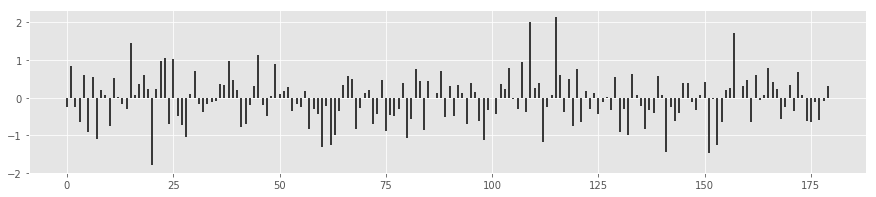

együttesem 	 egyittesem


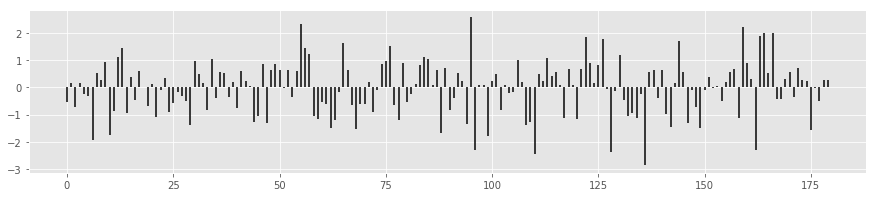

 képződött 	  képződött


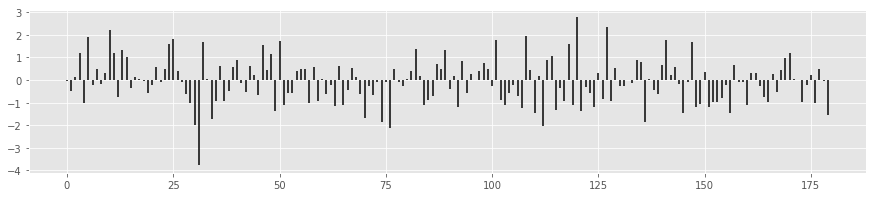

 óvodáinak 	  kvodáinak


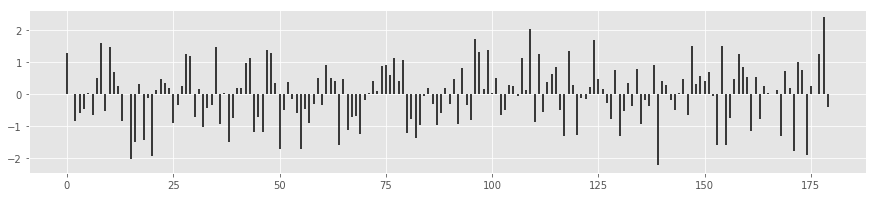

 fehérnemű 	  fehérnegt


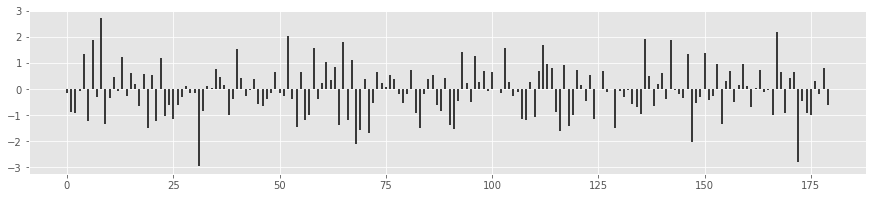

  reszelje 	   reszelje


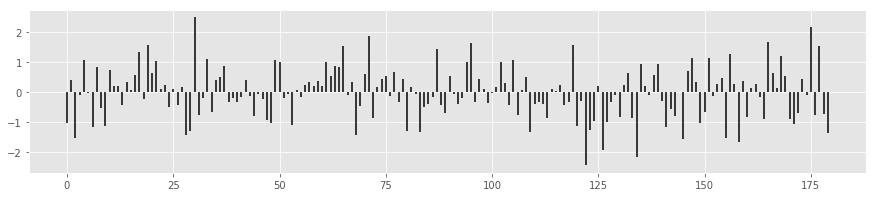

erődítmény 	 erudötmény


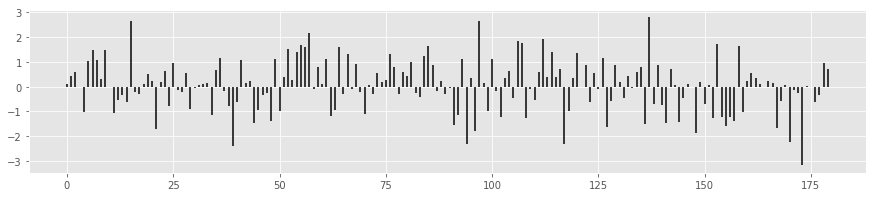

üdülőrégió 	  telörégió


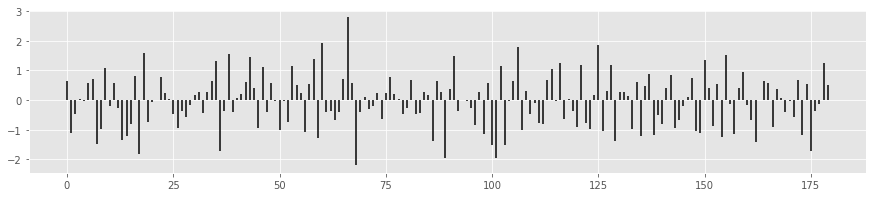

  egyeseké 	   egyesegk


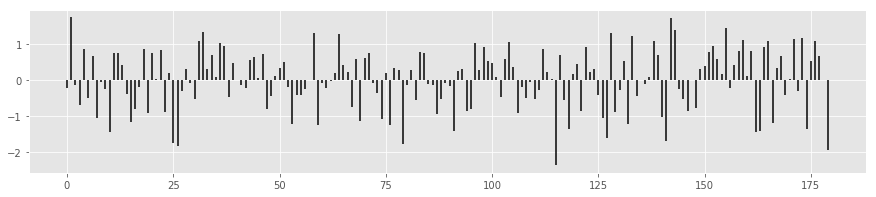


Accuracy on data:  95.76734373466785 %


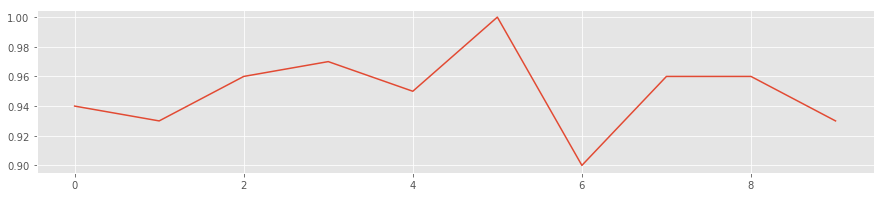

In [3]:
show_performance(encoder,x_test,corp,100)

           	         ők


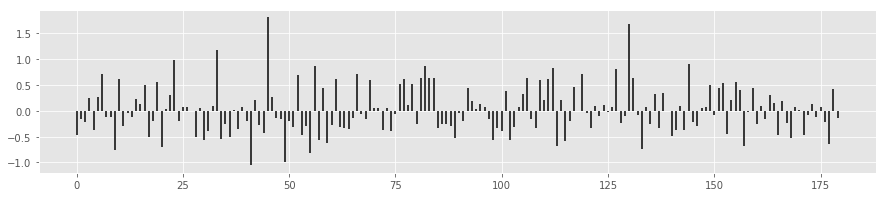

        eh 	         et


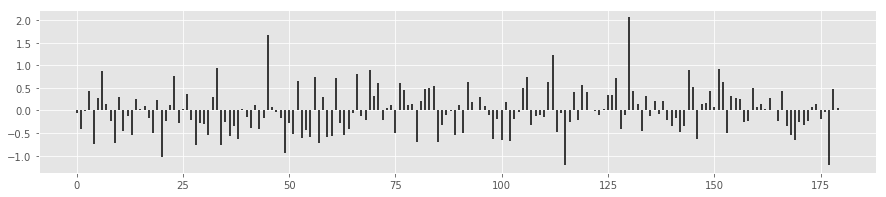

    kecske 	     kecske


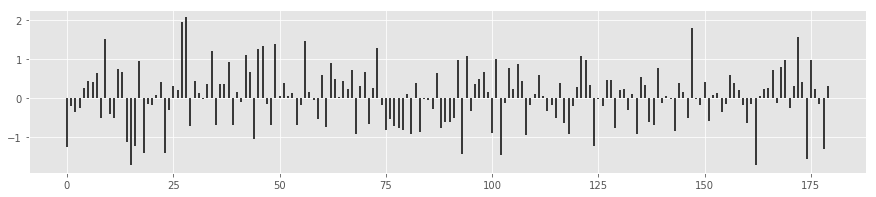

     kutya 	      kutka


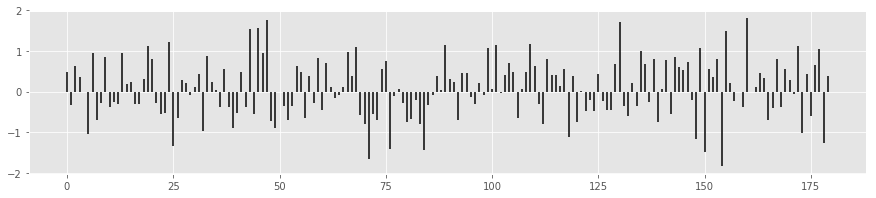

     aytuk 	      aytuk


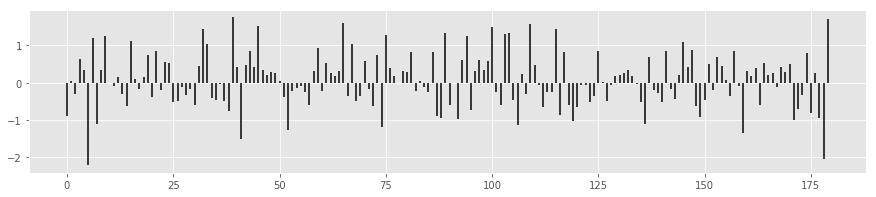

    macska 	     macska


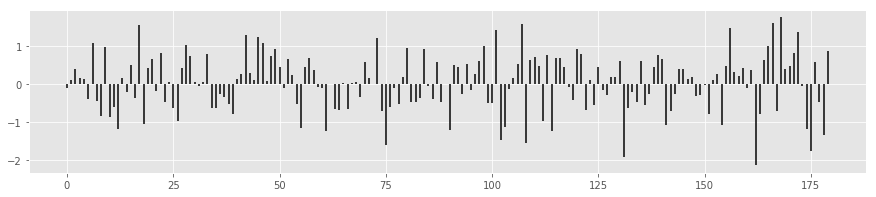

 árvíztűrő 	  árvhztórő


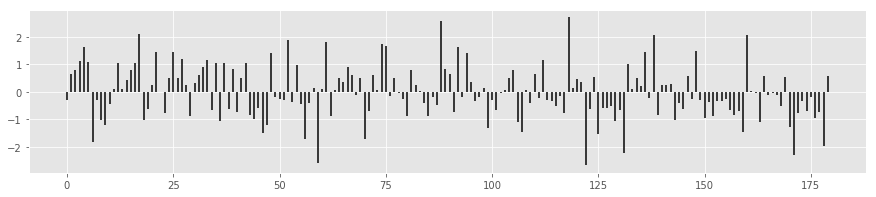

      fúró 	        óró


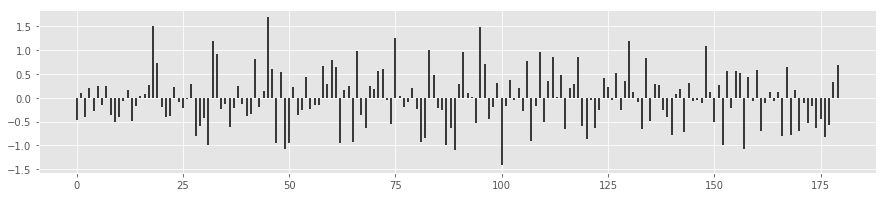

     kacsa 	      kapsa


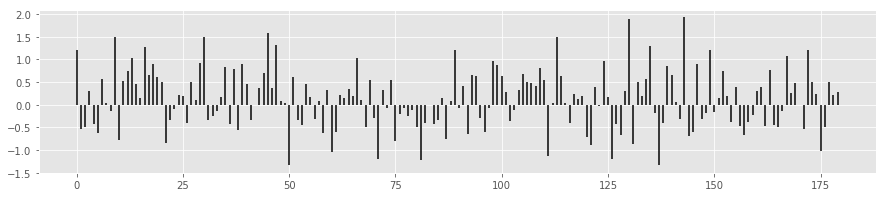

         a 	         ta


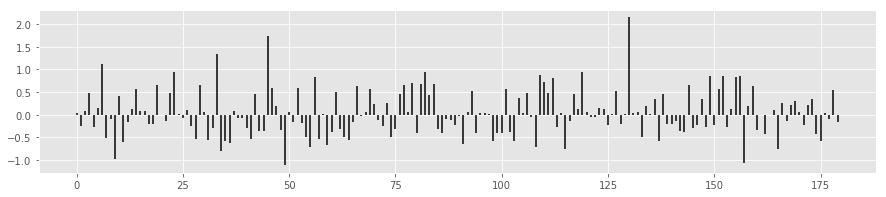

        és 	         és


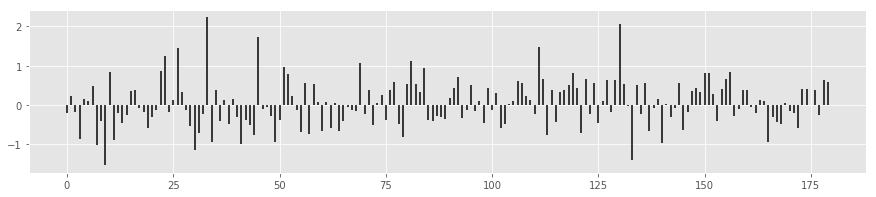


Accuracy on data:  90.0 %


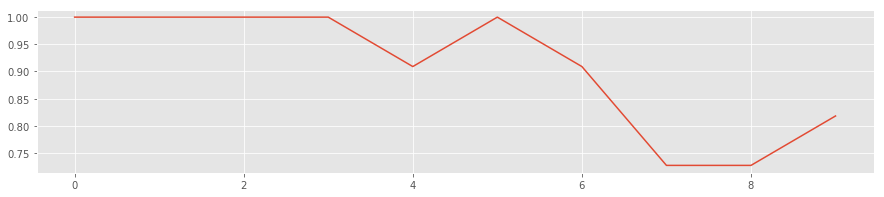

In [6]:
show_performance(encoder,["","eh","kecske","kutya","aytuk","macska","árvíztűrő","fúró","kacsa","a","és"],corp)

In [5]:
def decode_critical(enc=180):
    for POS in range(enc):
        encoded=np.ones(enc)
        encoded[POS]=0
        a=encoder.decode([encoded])[0].reshape([10,36])

        b=corp.defeaturize_data_charlevel_onehot([a])
        print(b)